## SARIMA Future Forecast

c:\Users\bollejayanthsriteja\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 2607
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -5335.916
Date:                            Mon, 29 Sep 2025   AIC                          10681.832
Time:                                    10:31:08   BIC                          10711.110
Sample:                                01-02-2015   HQIC                         10692.445
                                     - 12-30-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4659      0.325      1.433      0.152      -0.171       1.103
ma.L1         -2.0272      1.322   

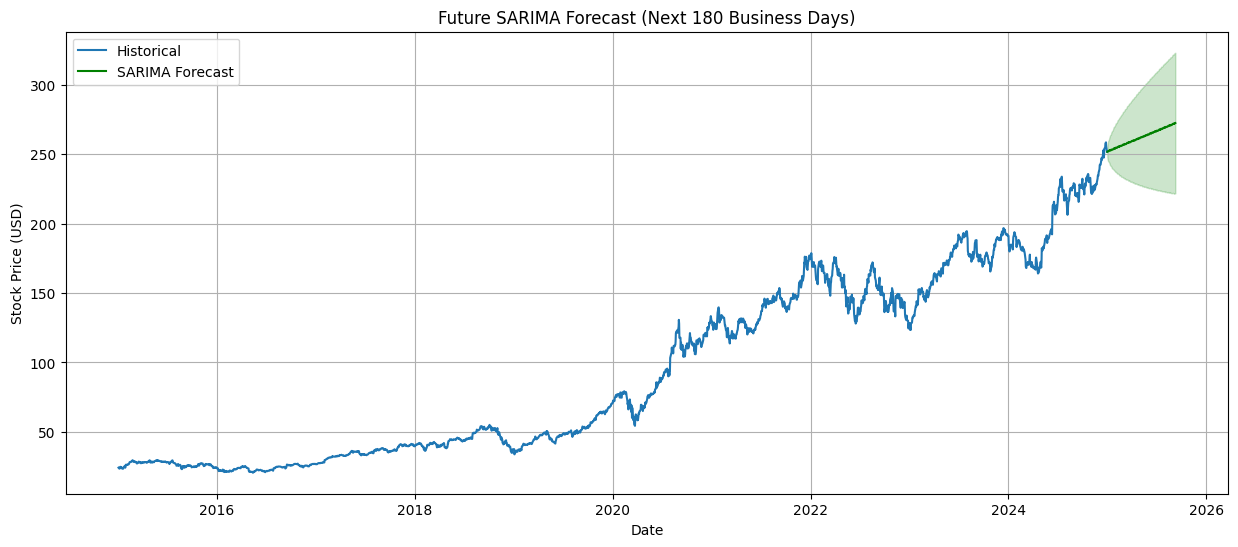

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import os

df = pd.read_csv("AAPL_clean.csv", parse_dates=['Date'])
df.set_index('Date', inplace=True)
df = df.asfreq('B')
df['Close'] = pd.to_numeric(df['Close'], errors='coerce').ffill()

model = SARIMAX(df['Close'],
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)
sarima_result = model.fit(disp=False)
print(sarima_result.summary())

forecast_steps = 180
forecast = sarima_result.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

last_date = df.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1),
                               periods=forecast_steps, freq='B')

os.makedirs("Models", exist_ok=True)

future_sarima_df = pd.DataFrame({
    'Date': forecast_index,
    'Forecast': forecast_values
})
future_sarima_df.to_csv("Models/future_sarima.csv", index=False)
print("Future SARIMA predictions saved to 'Models/future_sarima.csv'")

plt.figure(figsize=(15, 6))
plt.plot(df['Close'], label='Historical')
plt.plot(forecast_index, forecast_values, label='SARIMA Forecast', color='green')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1],
                 color='green', alpha=0.2)
plt.title("Future SARIMA Forecast (Next 180 Business Days)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)
plt.show()